## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from pandas.plotting import scatter_matrix

## Load Dataset

In [2]:
#Load Online Retail II from 2009-2011(Combined-sheets)
df_0 = pd.concat(pd.read_excel('C:/Users/sifne/Online_Retail_II.xlsx', sheet_name=None), ignore_index=True)

In [3]:
#Save to 'online_retail.csv'
file = df_0.to_csv("C:\\Users\\sifne\\online_retail.csv")
df=df_0

In [4]:
#Check the first 5 rows and the shape of dataset
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.shape

(1067371, 8)

In [6]:
#Check the type of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [7]:
#Check unique attributes
df.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

In [8]:
#Check for duplicates
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1067366    False
1067367    False
1067368    False
1067369    False
1067370    False
Length: 1067371, dtype: bool

In [9]:
#Summary of Statistics
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1067371.0,1067371,1062989,1.067371e+06,1067371,1.067371e+06,824364.000000,1067371
unique,53628.0,5305,5698,NaN,47635,NaN,NaN,43
top,537434.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,NaN,United Kingdom
freq,1350.0,5829,5918,NaN,1350,NaN,NaN,981330
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.938898e+00,NaN,4.649388e+00,15324.638504,NaN
std,NaN,NaN,NaN,1.727058e+02,NaN,1.235531e+02,1697.464450,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,-5.359436e+04,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,13975.000000,NaN


## Data Preparation-Cleaning

In [10]:
#Check for missing values
df.isnull().sum(axis=0)

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [11]:
#Delete rows that customerID = Null
df = df[pd.notnull(df['Customer ID'])]

In [12]:
#Keep only the non-canceled orders
df = df[df['Quantity']>0]

In [13]:
#Keep positive prices
df = df[df['Price']>0]

In [14]:
#Split datetime from InvoiceDate
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time

#Drop InvoiceDate column
df.drop(['InvoiceDate'], axis=1, inplace=True)


In [15]:
df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Date,Time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01,07:45:00


In [16]:
df.shape

(805549, 9)

In [17]:
#Check for null values
df.isnull().sum(axis=0)

Invoice        0
StockCode      0
Description    0
Quantity       0
Price          0
Customer ID    0
Country        0
Date           0
Time           0
dtype: int64

In [18]:
#Delete the Unspecified Countries
df = df[df.Country != 'Unspecified']

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805028 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805028 non-null  object        
 1   StockCode    805028 non-null  object        
 2   Description  805028 non-null  object        
 3   Quantity     805028 non-null  int64         
 4   Price        805028 non-null  float64       
 5   Customer ID  805028 non-null  float64       
 6   Country      805028 non-null  object        
 7   Date         805028 non-null  datetime64[ns]
 8   Time         805028 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 61.4+ MB


In [20]:
#Check for duplicate rows-we dont have any
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1067366    False
1067367    False
1067368    False
1067369    False
1067370    False
Length: 805028, dtype: bool

## Data Exploration

In [21]:
#nunique omit missing values
print('Total unique transactions: ',df['Invoice'].nunique())
print('Unique customers: ',df['Customer ID'].nunique())
print('Unique Countries: ',df['Country'].nunique())

Total unique transactions:  36953
Unique customers:  5872
Unique Countries:  40


In [22]:
#unique customers in each country
unique_customers_country=df[['Customer ID','Country']].drop_duplicates()

In [23]:
#check for returning customers-we can see that they are returning
df[['Country','Customer ID']].duplicated()

0          False
1           True
2           True
3           True
4           True
           ...  
1067366     True
1067367     True
1067368     True
1067369     True
1067370     True
Length: 805028, dtype: bool

In [24]:
#count of customers for each country-graph
# ~90% of transactions comes from UK 
unique_customers_country.groupby(['Country'])['Customer ID'].aggregate('count').reset_index().sort_values('Customer ID'
                                                                                                          ,ascending=False)

,Country,Customer ID
38,United Kingdom,5350
14,Germany,107
13,France,95
32,Spain,41
3,Belgium,29
28,Portugal,24
34,Switzerland,22
24,Netherlands,22
33,Sweden,19
18,Italy,17


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

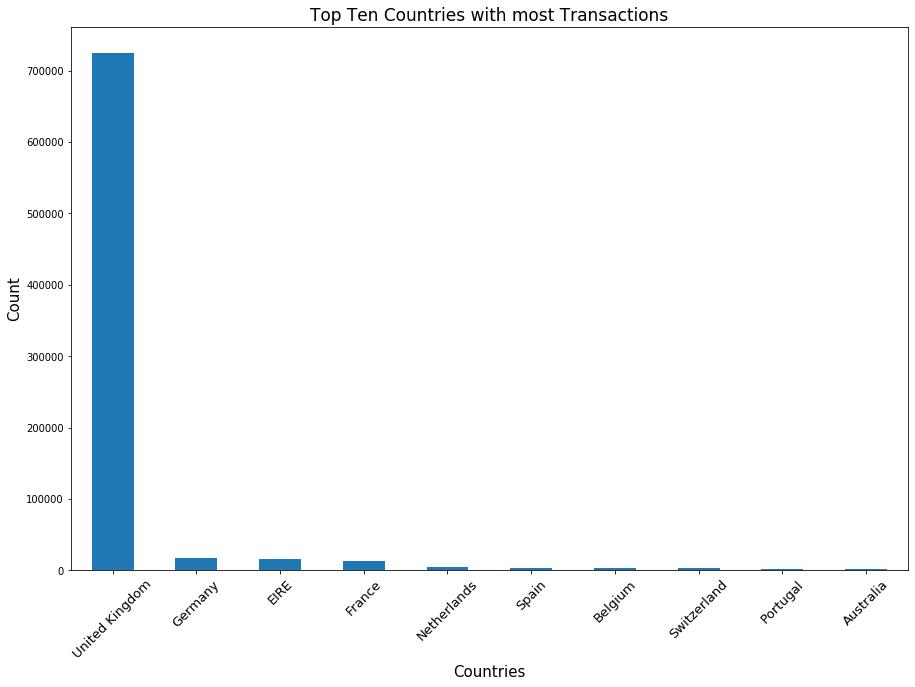

In [25]:
#Top 10 Countries
plt.title('Top Ten Countries with most Transactions',fontsize=17)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Count',fontsize=15)
df.Country.value_counts().head(10).plot.bar(figsize=(15,10))
plt.xticks(rotation=45,fontsize=13)

In [26]:
#Keep only United Kingdom data 
df.loc[df['Country'] == 'United Kingdom']

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Date,Time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01,07:45:00
...,...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,1.95,15804.0,United Kingdom,2011-12-09,12:31:00
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2.95,13113.0,United Kingdom,2011-12-09,12:49:00
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,1.25,13113.0,United Kingdom,2011-12-09,12:49:00
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,8.95,13113.0,United Kingdom,2011-12-09,12:49:00


In [29]:
#Compute the Revenue from each purchase
df['Revenue'] = df['Price'] * df['Quantity']
df.head(10)

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Date,Time,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,07:45:00,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,07:45:00,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,07:45:00,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01,07:45:00,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01,07:45:00,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,1.65,13085.0,United Kingdom,2009-12-01,07:45:00,39.6
6,489434,21871,SAVE THE PLANET MUG,24,1.25,13085.0,United Kingdom,2009-12-01,07:45:00,30.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,5.95,13085.0,United Kingdom,2009-12-01,07:45:00,59.5
8,489435,22350,CAT BOWL,12,2.55,13085.0,United Kingdom,2009-12-01,07:46:00,30.6
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,3.75,13085.0,United Kingdom,2009-12-01,07:46:00,45.0


In [28]:
monthly_orders=df.set_index('Date')['Invoice'].resample('M').nunique()

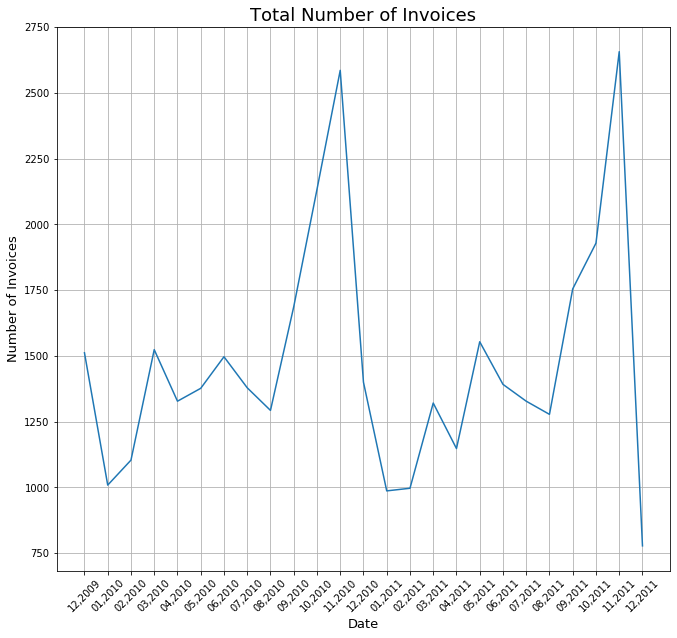

In [30]:
ax=pd.DataFrame(monthly_orders.values).plot(grid=True,figsize=(11,10),legend=False)
ax.set_xlabel('Date',fontsize=13)
ax.set_ylabel('Number of Invoices',fontsize=13)
ax.set_title('Total Number of Invoices',fontsize=18)
plt.xticks(range(len(monthly_orders.index)), 
                 [x.strftime('%m,%Y') for x in monthly_orders.index], 
                 rotation=45 
                )
plt.show()

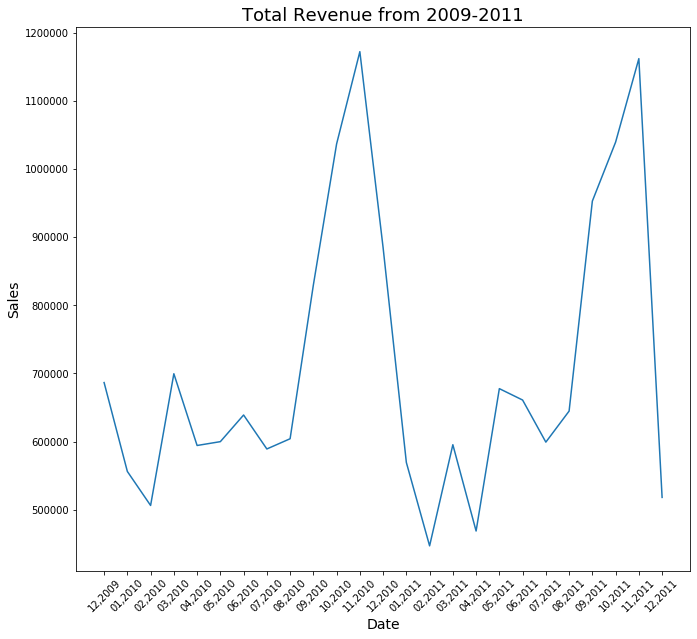

In [31]:
monthly_revenue = df.set_index('Date')['Revenue'].resample('M').sum()
ax=pd.DataFrame(monthly_revenue.values).plot(figsize=(11,10),legend=False)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Sales',fontsize=14)
ax.set_title('Total Revenue from 2009-2011',fontsize=18)

#ax.set_ylim([500,10000])
plt.xticks(range(len(monthly_revenue.index)), 
                 [x.strftime('%m,%Y') for x in monthly_revenue.index], 
                 rotation=45 
                )
plt.show()

## RFM Analysis

#### Recency - days since last purchase
#### Frequency - count of days with purchases
#### Monetary - total money spend

In [32]:
#Identify the first purchase date
df['Date'].min()

Timestamp('2009-12-01 00:00:00')

In [33]:
#Identify the last purchase date 
df['Date'].max()

Timestamp('2011-12-09 00:00:00')

## Recency

In [34]:
#Next day of the last purchase
current_date = dt.date(2011,12,10)

In [35]:
#Create a new column called Date_2 with the date of invoice
df['Date_2'] = df['Date'].dt.date

In [36]:
#Group by customers and make the last date of purshace
recency_table = df.groupby(by='Customer ID', as_index=False)['Date_2'].max()
recency_table.columns = ['Customer ID','Last_Purchase']
recency_table.head()

,Customer ID,Last_Purchase
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [37]:
#Recency 
recency_table['Recency'] = recency_table['Last_Purchase'].apply(lambda x: (current_date - x).days)

In [38]:
recency_table.head()

,Customer ID,Last_Purchase,Recency
0,12346.0,2011-01-18,326
1,12347.0,2011-12-07,3
2,12348.0,2011-09-25,76
3,12349.0,2011-11-21,19
4,12350.0,2011-02-02,311


## Frequency

In [39]:
dataset_copy=df
#Drop duplicate customers
dataset_copy.drop_duplicates(subset=['Invoice', 'Customer ID'], keep="first", inplace=True)

In [40]:
#Create frequency table
frequency_table = dataset_copy.groupby(by=['Customer ID'], as_index=False)['Invoice'].count()
frequency_table.columns = ['Customer ID','Frequency']

In [41]:
frequency_table.head()

,Customer ID,Frequency
0,12346.0,12
1,12347.0,8
2,12348.0,5
3,12349.0,4
4,12350.0,1


## Monetary

In [42]:
#Create Monetary table
monetary_table = df.groupby(by='Customer ID',as_index=False).agg({'Revenue': 'sum'})
monetary_table.columns = ['Customer ID','Monetary']

In [43]:
monetary_table.head()

,Customer ID,Monetary
0,12346.0,77397.84
1,12347.0,180.86
2,12348.0,344.56
3,12349.0,252.65
4,12350.0,25.20


In [44]:
#RFM table
rfm_table = recency_table.merge(frequency_table,on='Customer ID')
rfm_table = rfm_table.merge(monetary_table,on='Customer ID')
rfm_table.head()

,Customer ID,Last_Purchase,Recency,Frequency,Monetary
0,12346.0,2011-01-18,326,12,77397.84
1,12347.0,2011-12-07,3,8,180.86
2,12348.0,2011-09-25,76,5,344.56
3,12349.0,2011-11-21,19,4,252.65
4,12350.0,2011-02-02,311,1,25.20


In [45]:
quantiles = rfm_table[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.25, 0.5, 0.75]).to_dict()
quantiles 

{'Recency': {0.25: 26.0, 0.5: 96.0, 0.75: 380.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 7.0},
 'Monetary': {0.25: 20.8, 0.5: 63.33, 0.75: 183.98749999999998}}

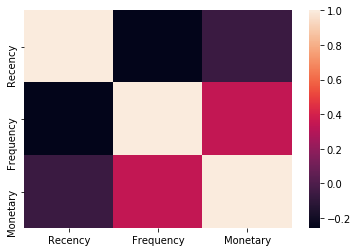

In [46]:
sns.heatmap(rfm_table[['Recency', 'Frequency', 'Monetary']].corr())

## Quartiles Creation

In [47]:
def R_score(x):
    if x <= quantiles['Recency'][0.25]:
        return 4
    elif x <= quantiles['Recency'][0.5]:
        return 3
    elif x <= quantiles['Recency'][0.75]:
        return 2
    else:
        return 1
    
def FM_scores(x, c):
    if x <= quantiles[c][0.25]:
        return 1
    elif x <= quantiles[c][0.5]:
        return 2
    elif x <= quantiles[c][0.75]:
        return 3
    else:
        return 4

In [48]:
#create RFM Scores
rfm_scores = rfm_table
rfm_scores['R_Quantile'] = rfm_scores['Recency'].apply(lambda x: R_score(x))
rfm_scores['F_Quantile'] = rfm_scores['Frequency'].apply(lambda x: FM_scores(x, 'Frequency'))
rfm_scores['M_Quantile'] = rfm_scores['Monetary'].apply(lambda x: FM_scores(x, 'Monetary'))

In [49]:
rfm_scores.head()

,Customer ID,Last_Purchase,Recency,Frequency,Monetary,R_Quantile,F_Quantile,M_Quantile
0,12346.0,2011-01-18,326,12,77397.84,2,4,4
1,12347.0,2011-12-07,3,8,180.86,4,4,3
2,12348.0,2011-09-25,76,5,344.56,3,3,4
3,12349.0,2011-11-21,19,4,252.65,4,3,4
4,12350.0,2011-02-02,311,1,25.20,2,1,2


In [50]:
#Combine the RFM scores
rfm_scores['RFM_Score'] = rfm_scores.R_Quantile.map(str) + rfm_scores.F_Quantile.map(str) + rfm_scores.M_Quantile.map(str)
rfm_scores.head()

,Customer ID,Last_Purchase,Recency,Frequency,Monetary,R_Quantile,F_Quantile,M_Quantile,RFM_Score
0,12346.0,2011-01-18,326,12,77397.84,2,4,4,244
1,12347.0,2011-12-07,3,8,180.86,4,4,3,443
2,12348.0,2011-09-25,76,5,344.56,3,3,4,334
3,12349.0,2011-11-21,19,4,252.65,4,3,4,434
4,12350.0,2011-02-02,311,1,25.20,2,1,2,212


In [51]:
#444 score defines the best customers
rfm_scores[rfm_scores['RFM_Score']=='444'].sort_values('Monetary', ascending=False).head(10)

,Customer ID,Last_Purchase,Recency,Frequency,Monetary,R_Quantile,F_Quantile,M_Quantile,RFM_Score
5686,18102.0,2011-12-09,1,145,85980.83,4,4,4,444
5534,17949.0,2011-12-08,2,118,83176.61,4,4,4,444
2272,14646.0,2011-12-08,2,151,35296.62,4,4,4,444
3454,15838.0,2011-11-28,12,34,32047.78,4,4,4,444
3626,16013.0,2011-12-06,4,84,31324.10,4,4,4,444
5044,17450.0,2011-12-01,9,51,31116.41,4,4,4,444
1785,14156.0,2011-11-30,10,156,26040.83,4,4,4,444
578,12931.0,2011-11-18,22,57,25027.18,4,4,4,444
2533,14911.0,2011-12-08,2,398,24808.43,4,4,4,444
2680,15061.0,2011-12-06,4,127,22926.79,4,4,4,444


In [52]:
rfm_unique_customers = rfm_scores.groupby('Customer ID')['Customer ID'].nunique()
print("Total number of customers: ",rfm_unique_customers.sum()) 

Total number of customers:  5872


In [53]:
rfm_unique_scores = rfm_scores.groupby('RFM_Score')['RFM_Score'].nunique()

print("Number of Unique Scores: ",rfm_unique_scores.sum())
print("Most Loyal Customers: ",len(rfm_scores[rfm_scores['F_Quantile']==4]))
print("Best Customers: ",len(rfm_scores[rfm_scores['RFM_Score']=='444']))
print("High Spending Customers: ",len(rfm_scores[rfm_scores['M_Quantile']==4]))
print('Customers with a Risk to lose: ',len(rfm_scores[rfm_scores['RFM_Score']=='111']))

Number of Unique Scores:  61
Most Loyal Customers:  1299
Best Customers:  552
High Spending Customers:  1468
Customers with a Risk to lose:  596


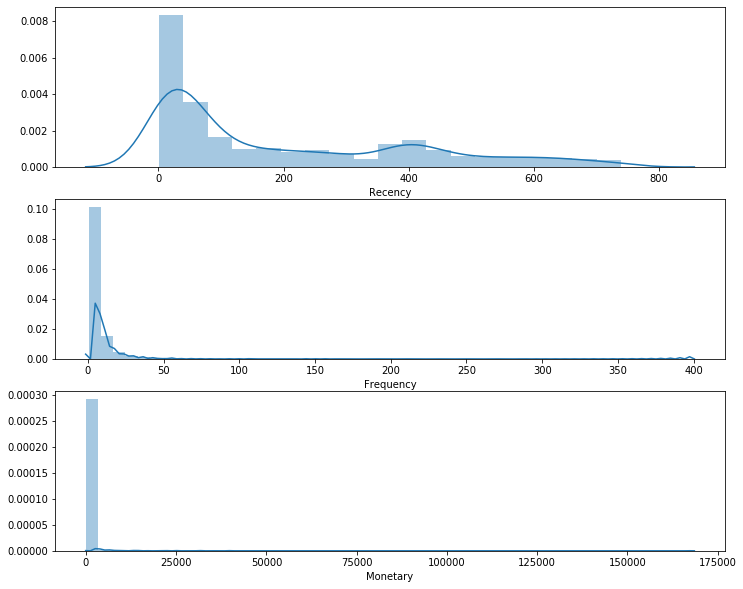

In [54]:
# Plot RFM distributions
plt.figure(figsize=(12,10))

#Distribution of Recency
plt.subplot(3, 1, 1); sns.distplot(rfm_scores['Recency'])

#Distribution of Frequency
plt.subplot(3, 1, 2); sns.distplot(rfm_scores['Frequency'])

#Distribution of Monetary
plt.subplot(3, 1, 3); sns.distplot(rfm_scores['Monetary'])

#Indicate Right Skewed-we need to scale the data for the K-means,thus we should use log
plt.show()

In [55]:
#Sum of RFM values
rfm_scores['Sum_of_RFM_Score'] = rfm_scores[['R_Quantile', 'F_Quantile', 'M_Quantile']].sum(axis=1)

In [56]:
rfm_scores.head()

,Customer ID,Last_Purchase,Recency,Frequency,Monetary,R_Quantile,F_Quantile,M_Quantile,RFM_Score,Sum_of_RFM_Score
0,12346.0,2011-01-18,326,12,77397.84,2,4,4,244,10
1,12347.0,2011-12-07,3,8,180.86,4,4,3,443,11
2,12348.0,2011-09-25,76,5,344.56,3,3,4,334,10
3,12349.0,2011-11-21,19,4,252.65,4,3,4,434,11
4,12350.0,2011-02-02,311,1,25.20,2,1,2,212,5


In [57]:
#Customer Segmentation based on RFM_score to define loyalty levels
loyalty_levels = ['Bronze','Silver','Gold']
Score_cuts = pd.qcut(rfm_scores.Sum_of_RFM_Score,q=3,labels=loyalty_levels)
rfm_scores['Loyalty_levels'] = Score_cuts.values

In [58]:
rfm_scores.head()


,Customer ID,Last_Purchase,Recency,Frequency,Monetary,R_Quantile,F_Quantile,M_Quantile,RFM_Score,Sum_of_RFM_Score,Loyalty_levels
0,12346.0,2011-01-18,326,12,77397.84,2,4,4,244,10,Gold
1,12347.0,2011-12-07,3,8,180.86,4,4,3,443,11,Gold
2,12348.0,2011-09-25,76,5,344.56,3,3,4,334,10,Gold
3,12349.0,2011-11-21,19,4,252.65,4,3,4,434,11,Gold
4,12350.0,2011-02-02,311,1,25.20,2,1,2,212,5,Bronze


In [59]:
#Statistical Analysis of RFM based on segments
rfm_level_agg = rfm_scores.groupby('Loyalty_levels').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)


               Recency Frequency Monetary      
                  mean      mean     mean count
Loyalty_levels                                 
Bronze           360.4       1.5     38.2  2411
Silver           139.9       4.1    205.3  1850
Gold              35.7      16.0   1143.8  1611


In [60]:
#the top 10 RFM Scores that most customers belong to
rfm_scores.groupby('RFM_Score').size().sort_values(ascending=False)[:10]

RFM_Score
111    596
444    552
344    276
211    275
222    264
333    228
122    220
233    208
322    196
311    190
dtype: int64

In [61]:
#Best customers
rfm_scores[rfm_scores['RFM_Score']=='444'].head(10)

,Customer ID,Last_Purchase,Recency,Frequency,Monetary,R_Quantile,F_Quantile,M_Quantile,RFM_Score,Sum_of_RFM_Score,Loyalty_levels
15,12362.0,2011-12-06,4,11,345.13,4,4,4,444,12,Gold
32,12380.0,2011-11-18,22,11,2174.67,4,4,4,444,12,Gold
46,12395.0,2011-11-20,20,15,259.51,4,4,4,444,12,Gold
66,12415.0,2011-11-15,25,28,7230.94,4,4,4,444,12,Gold
68,12417.0,2011-12-06,4,20,300.70,4,4,4,444,12,Gold
79,12428.0,2011-11-14,26,9,769.48,4,4,4,444,12,Gold
80,12429.0,2011-11-30,10,8,280.98,4,4,4,444,12,Gold
84,12433.0,2011-12-09,1,10,270.96,4,4,4,444,12,Gold
88,12437.0,2011-12-08,2,39,1270.76,4,4,4,444,12,Gold
115,12464.0,2011-11-29,11,8,259.40,4,4,4,444,12,Gold


In [62]:
# Summary Metrics per RFM score
rfm_scores.groupby('Sum_of_RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency Monetary      
                    mean      mean     mean count
Sum_of_RFM_Score                                 
3                  541.4       1.0     11.5   596
4                  379.4       1.2     19.9   528
5                  295.9       1.6     31.2   621
6                  243.3       2.1     83.3   666
7                  181.6       3.0    135.9   635
8                  134.8       4.0    221.3   656
9                   98.3       5.5    265.5   559
10                  62.9       8.5    829.9   544
11                  33.7      12.0    589.1   515
12                  10.6      26.9   1970.7   552

In [63]:
#General Segment
def segment(df):
    if df['Sum_of_RFM_Score'] <= 5 :
        return 0 #Bronze
    elif (df['Sum_of_RFM_Score'] > 5) and (df['Sum_of_RFM_Score'] <= 9):
        return 2 #Silver
    else:
        return 1 #Gold

In [64]:
#General Segmentation from RFM to evaluate with K-means
rfm_scores['General_Segment'] = rfm_scores.apply(segment, axis=1)

df_rfm_custom_segment = rfm_scores.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

df_rfm_custom_segment

Recency Frequency Monetary      
                   mean      mean     mean count
General_Segment                                 
0                 405.0       1.3     21.1  1745
1                  35.7      16.0   1143.8  1611
2                 167.3       3.6    173.0  2516

## Preprocess for k-Means

In [65]:
#we dont have null values
rfm_scores[['Recency','Frequency','Monetary']].isnull().sum(axis=0)

Recency      0
Frequency    0
Monetary     0
dtype: int64

In [66]:
#Log transformation due to the right skew of the data
log_data = rfm_scores[['Recency','Frequency','Monetary']].apply(np.log,axis =1).round(3)

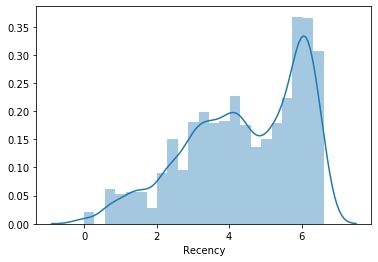

In [67]:
Recency_plot=log_data['Recency']
ax=sns.distplot(Recency_plot)

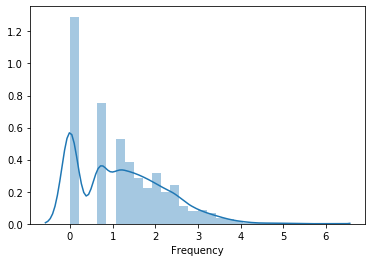

In [68]:
Frequency_plot=log_data['Frequency']
ax=sns.distplot(Frequency_plot)

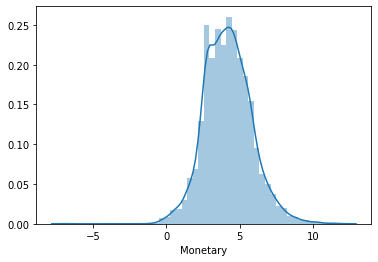

In [69]:
Monetary_plot=log_data['Monetary']
ax=sns.distplot(Monetary_plot)

In [70]:
log_data.head()

,Recency,Frequency,Monetary
0,5.787,2.485,11.257
1,1.099,2.079,5.198
2,4.331,1.609,5.842
3,2.944,1.386,5.532
4,5.740,0.000,3.227


In [71]:
#Data Scaling
scaled_data = StandardScaler().fit_transform(log_data)

In [72]:
#Save data in dataframe
scaled_data = pd.DataFrame(scaled_data,index=rfm_scores.index,columns=log_data.columns)

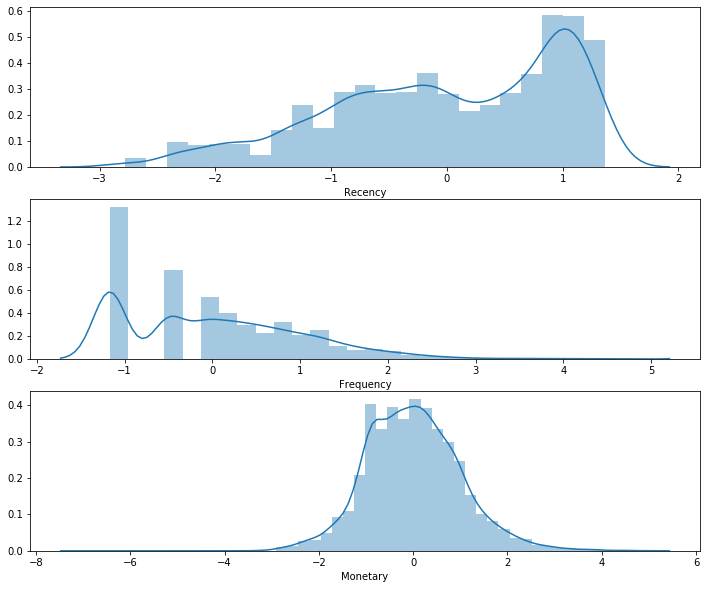

In [73]:
# Plot RFM distributions after Log Transform & Scaling
plt.figure(figsize=(12,10))

#Distribution of Recency
plt.subplot(3, 1, 1); sns.distplot(scaled_data['Recency'])

#Distribution of Frequency
plt.subplot(3, 1, 2); sns.distplot(scaled_data['Frequency'])

#Distribution of Monetary
plt.subplot(3, 1, 3); sns.distplot(scaled_data['Monetary'])

#Indicate Right Skewed-we need to scale the data for the K-means,thus we should use log
plt.show()

## k-Means Clustering

In [74]:
#the sum of squared distances of samples to the nearest cluster center
sq_dist={}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,init='k-means++',max_iter=2000)
    kmeans = kmeans.fit(scaled_data)
    sq_dist[k]=kmeans.inertia_
    

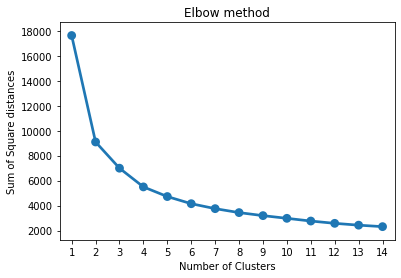

In [75]:
#Elbow Method:to find the optimal k
sns.pointplot(x = list(sq_dist.keys()),y=list(sq_dist.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Square distances')
plt.title('Elbow method')
plt.show()
#optimal no of clusters is 3

## For k=3 

In [76]:
#Get k=3 as the best no of clusters
kmeans_clust=KMeans(n_clusters=3,init='k-means++',max_iter=1000)
kmeans_clust.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [77]:
scaled_data['Clusters'] = kmeans_clust.labels_
kmeans_clust.labels_ = kmeans_clust.labels_
scaled_data.head(10)

,Recency,Frequency,Monetary,Clusters
0,0.849702,1.246522,4.389829,1
1,-2.088060,0.851861,0.617116,1
2,-0.062709,0.394988,1.018111,2
3,-0.931880,0.178216,0.825086,2
4,0.820249,-1.169075,-0.610152,0
5,-0.513901,1.069605,1.335046,1
6,0.558934,-0.495430,-0.551621,0
7,0.639146,-1.169075,-0.729703,0
8,0.589013,-0.495430,-0.070303,0
9,-0.812189,0.572877,0.825086,1


In [78]:
print(scaled_data.groupby('Clusters').agg({'Recency':'median', 'Frequency':'median', 'Monetary':'median'}))


           Recency  Frequency  Monetary
Clusters                               
0         0.958740  -1.169075 -0.838358
1        -1.079771   1.246522  1.001922
2        -0.038896   0.178216  0.150119


           Recency  Frequency  Monetary
Clusters                               
0         0.958740  -1.169075 -0.838358
1        -1.079771   1.246522  1.001922
2        -0.038896   0.178216  0.150119


Text(0, 0.5, 'Recency')

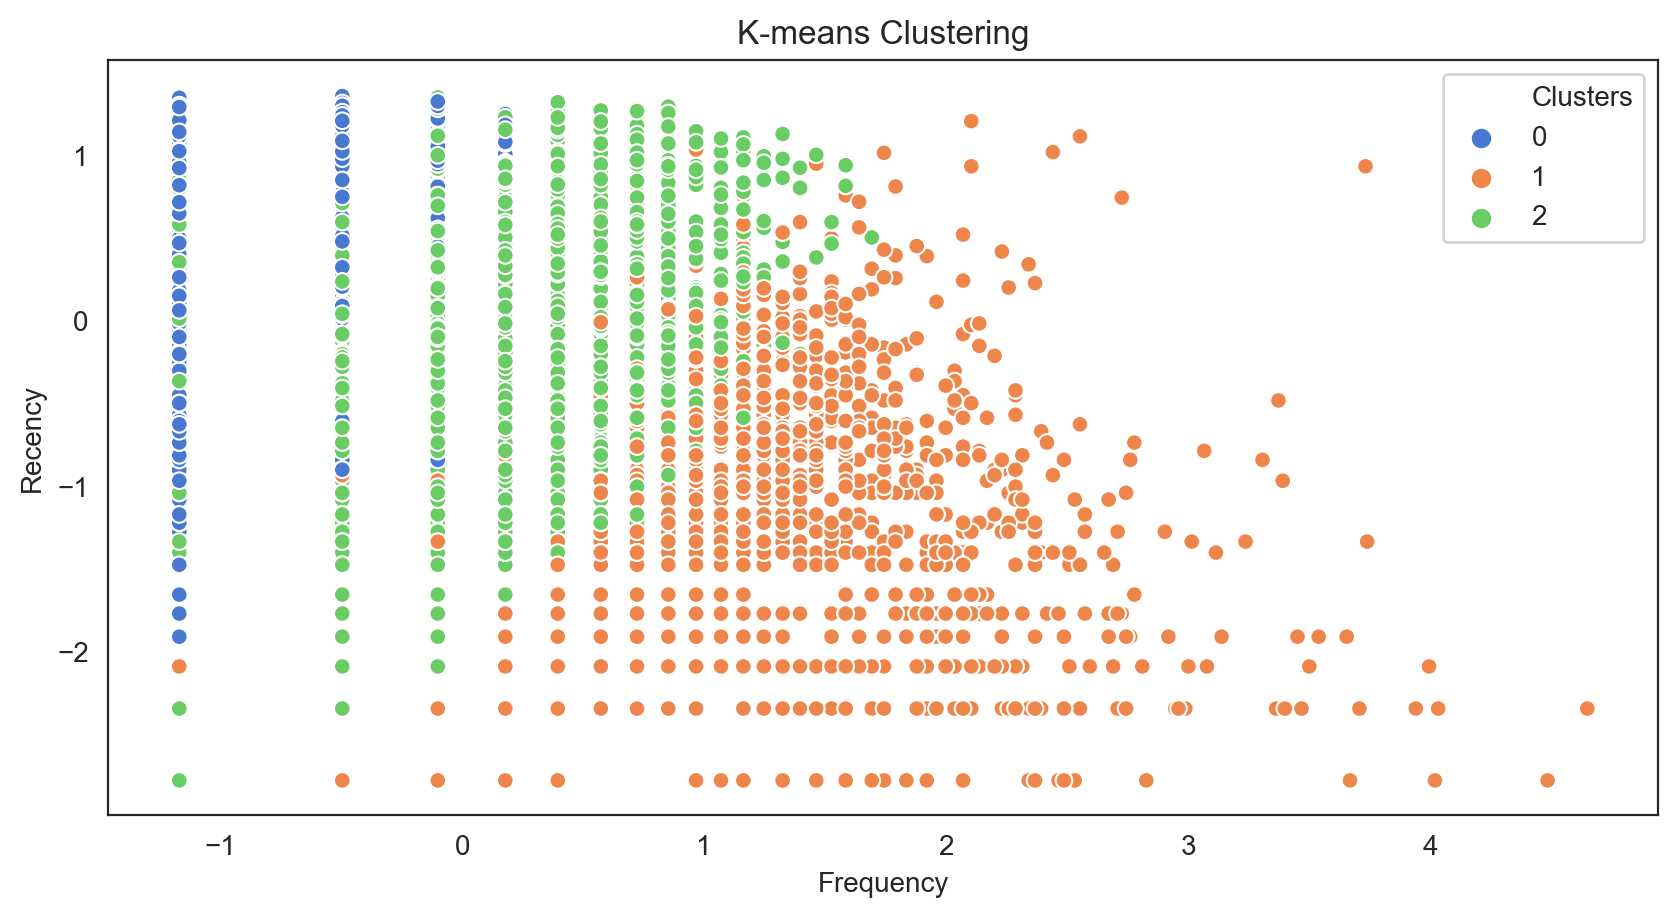

In [79]:
#2-Dimensional Plot for k=3 clusters
sns.set_style("white")
plt.figure(figsize=(10,5),frameon=True,dpi=200)
plt.title('K-means Clustering')
sns.scatterplot(x='Frequency', y='Recency',hue='Clusters',data=scaled_data, palette='muted')
print(scaled_data.groupby('Clusters').agg({'Recency':'median', 'Frequency':'median', 'Monetary':'median'}))
plt.xlabel('Frequency')
plt.ylabel('Recency')

#0:Bronze #1:Gold #2:Silver

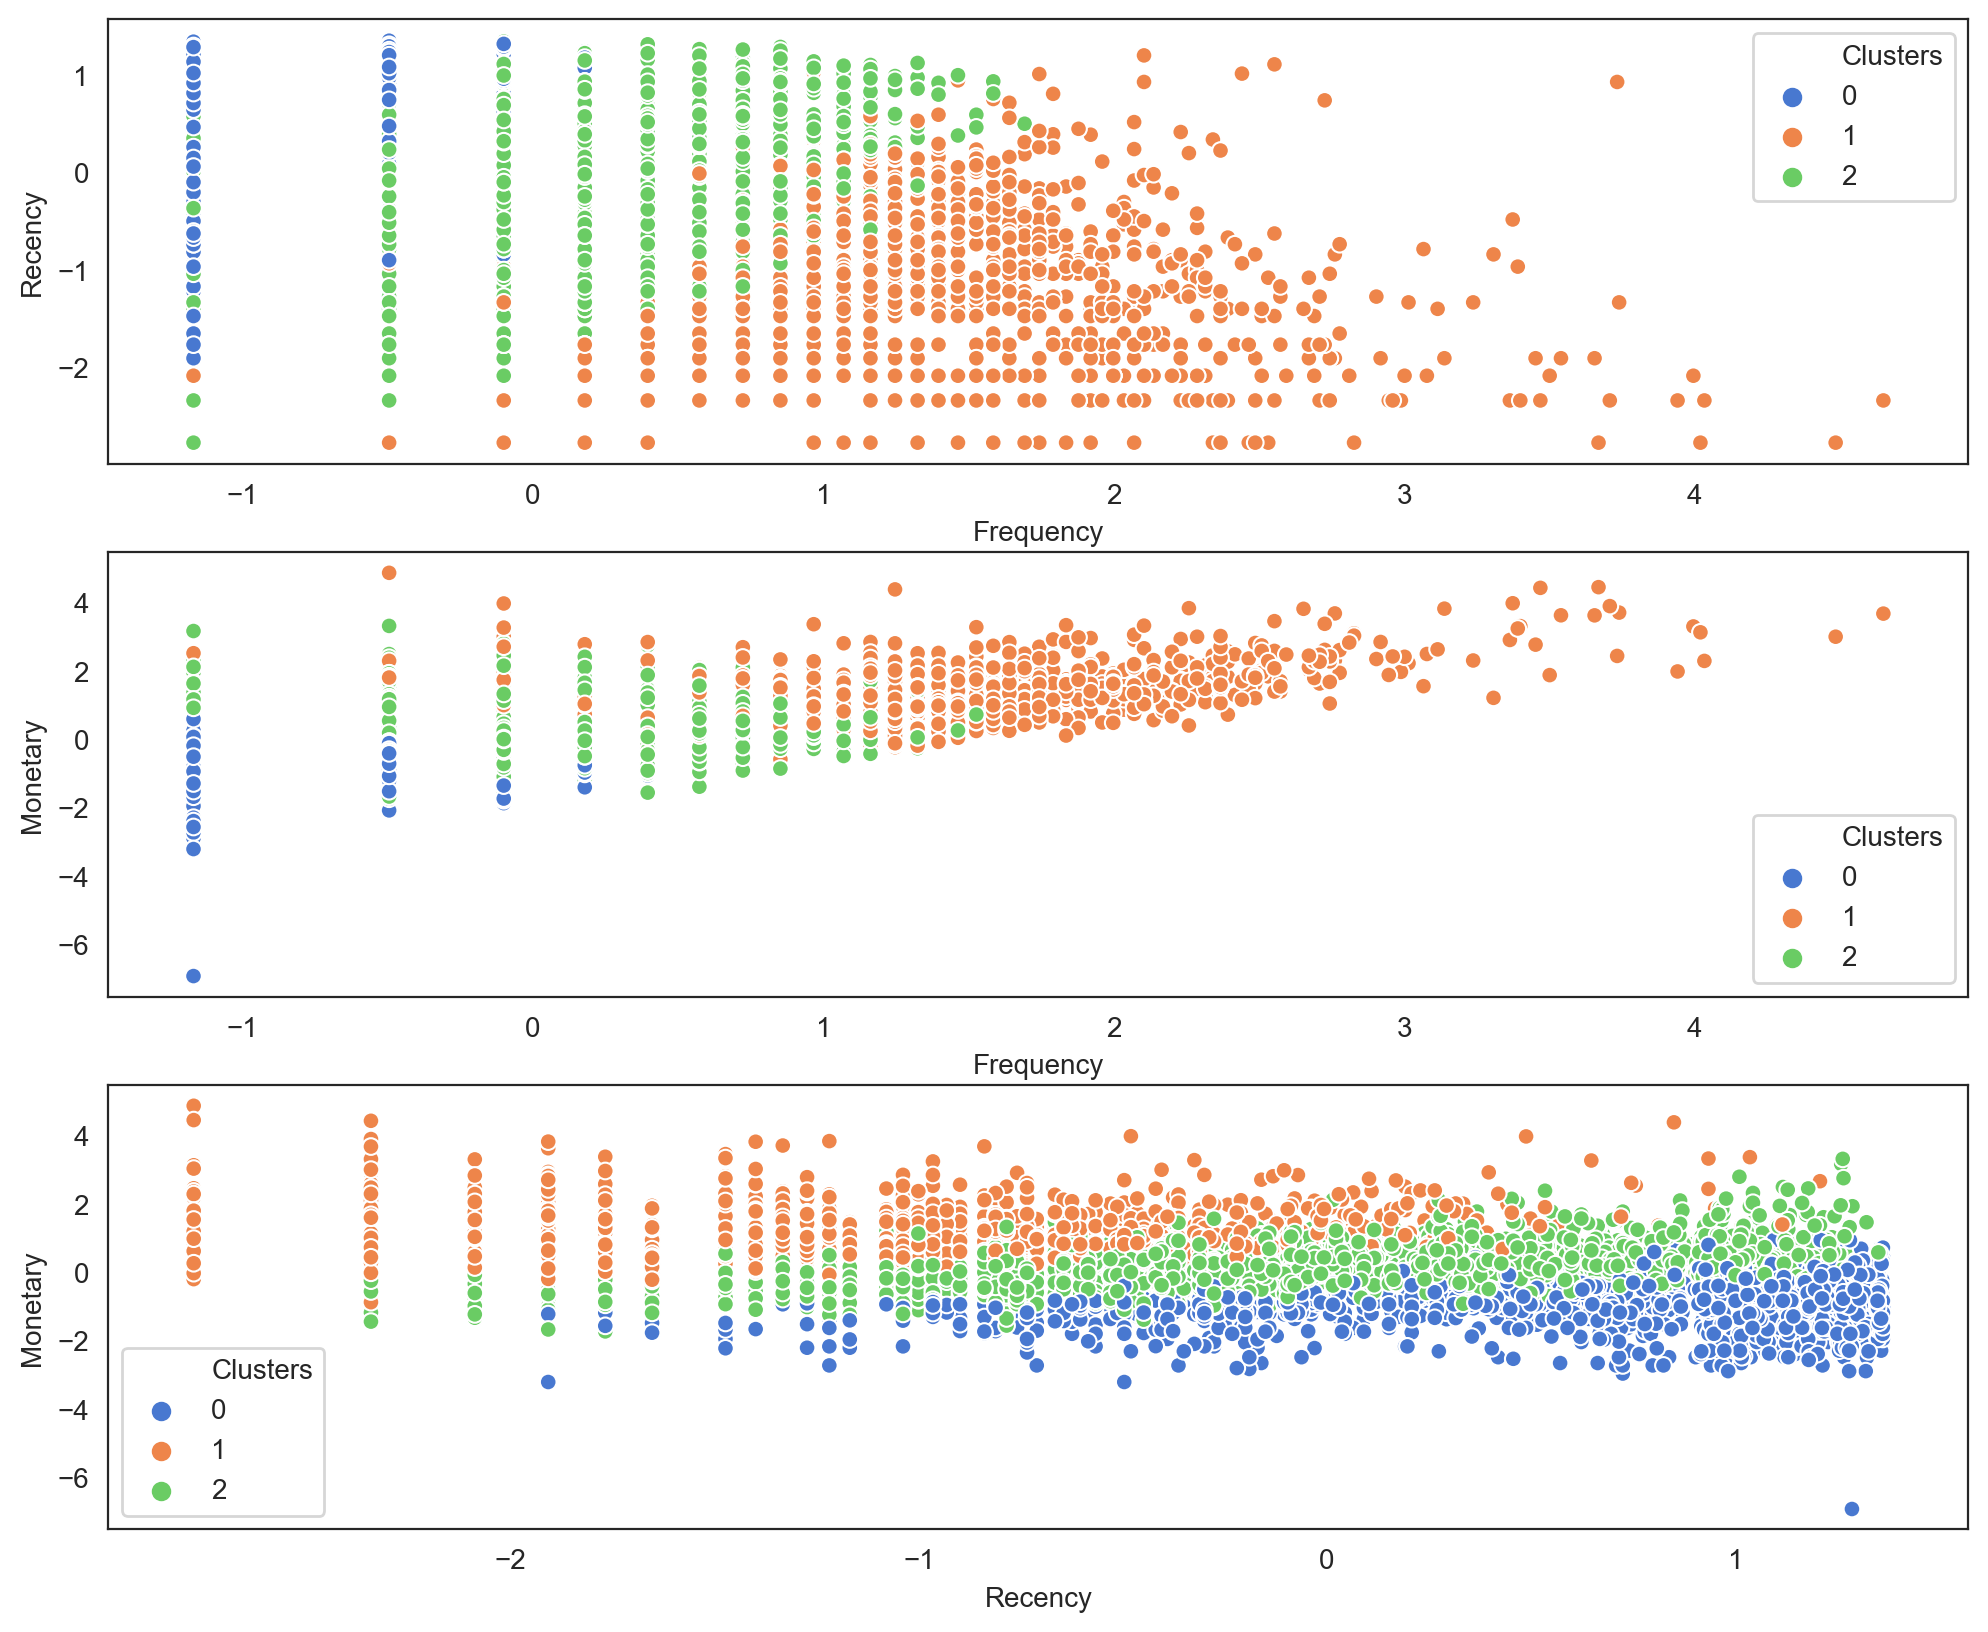

In [80]:
#2-Dimensional Plot for k=3 clusters
sns.set_style("white")
plt.figure(figsize=(12,10),frameon=True,dpi=200)
#plt.title('K-means Clustering')

plt.subplot(3, 1, 1); sns.scatterplot(x='Frequency', y='Recency',hue='Clusters',data=scaled_data, palette='muted')
plt.xlabel('Frequency')
plt.ylabel('Recency')

plt.subplot(3, 1, 2);  sns.scatterplot(x='Frequency', y='Monetary',hue='Clusters',data=scaled_data, palette='muted')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

plt.subplot(3, 1, 3); sns.scatterplot(x='Recency', y='Monetary',hue='Clusters',data=scaled_data, palette='muted')
plt.xlabel('Recency')
plt.ylabel('Monetary')

#0:Bronze #1:Gold #2:Silver
plt.show()

In [81]:
np.array(scaled_data['Clusters'])

array([1, 1, 2, ..., 0, 0, 2])

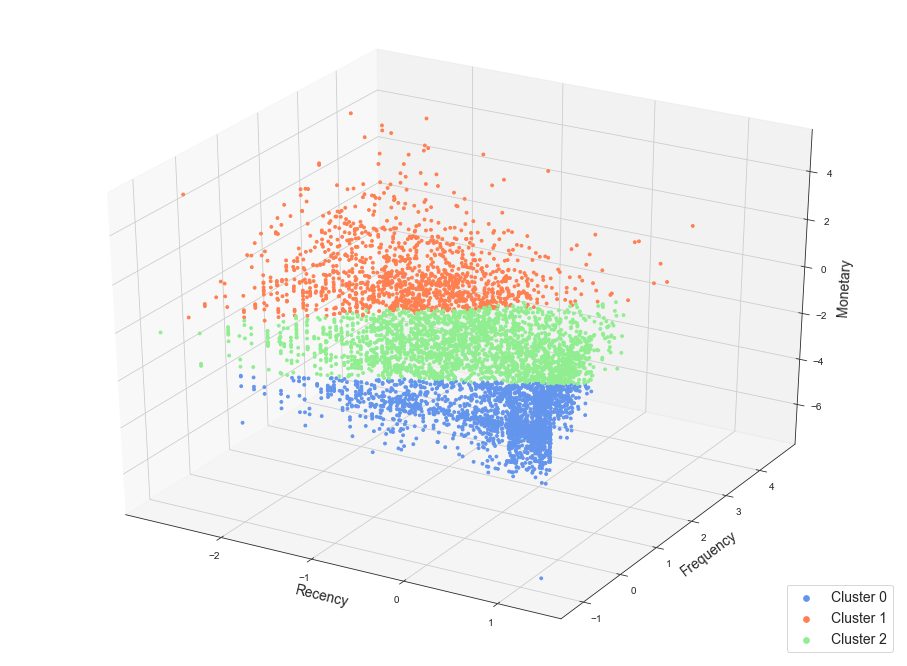

In [82]:
fig = plt.figure(figsize=(16,12))
dx = fig.add_subplot(111, projection='3d')
#plt.title('K-means Clustering in 3D projection',fontsize=16)
colors = [ 'cornflowerblue', 'coral', 'lightgreen']
for i in range(0,3):
    dx.scatter(scaled_data[scaled_data.Clusters == i].Recency, 
               scaled_data[scaled_data.Clusters == i].Frequency, 
               scaled_data[scaled_data.Clusters == i].Monetary, 
               c = colors[i], 
               label = 'Cluster ' + str(i), 
               s=8, alpha=1.0)
dx.set_xlabel('Recency', fontsize=14)
dx.set_ylabel('Frequency', fontsize=14)
dx.set_zlabel('Monetary', fontsize=14)
dx.legend(loc=4, markerscale=2.,fontsize=14)

## Evaluation 

In [83]:
confusion_matrix(np.array(rfm_scores.General_Segment,dtype='int'),kmeans_clust.labels_)

#np.array(rfm_scores.General_Segment,dtype='int')
#kmeans_clust.labels_

array([[1732,    0,   13],
       [   0, 1269,  342],
       [ 490,   42, 1984]], dtype=int64)

In [84]:
#Accuracy
print('Accuracy Score: ', accuracy_score(rfm_scores.General_Segment,kmeans_clust.labels_) )

Accuracy Score:  0.8489441416893733


In [85]:
#relabel=np.choose(kmeans_clust.labels_,[2,0,1]).astype(np.int)
print(classification_report(rfm_scores.General_Segment.astype(int),kmeans_clust.labels_))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1745
           1       0.97      0.79      0.87      1611
           2       0.85      0.79      0.82      2516

    accuracy                           0.85      5872
   macro avg       0.87      0.86      0.85      5872
weighted avg       0.86      0.85      0.85      5872



# Predictive Analytics

In [86]:
import copy
prediction_data=copy.deepcopy(rfm_scores)

In [87]:
prediction_data.head()

,Customer ID,Last_Purchase,Recency,Frequency,Monetary,R_Quantile,F_Quantile,M_Quantile,RFM_Score,Sum_of_RFM_Score,Loyalty_levels,General_Segment
0,12346.0,2011-01-18,326,12,77397.84,2,4,4,244,10,Gold,1
1,12347.0,2011-12-07,3,8,180.86,4,4,3,443,11,Gold,1
2,12348.0,2011-09-25,76,5,344.56,3,3,4,334,10,Gold,1
3,12349.0,2011-11-21,19,4,252.65,4,3,4,434,11,Gold,1
4,12350.0,2011-02-02,311,1,25.20,2,1,2,212,5,Bronze,0


In [88]:
#Drop the columns that not needed
prediction_data.drop(['Last_Purchase','R_Quantile','F_Quantile','M_Quantile','RFM_Score','Sum_of_RFM_Score','General_Segment'], axis=1 ,inplace=True)

In [89]:
prediction_data.head()

,Customer ID,Recency,Frequency,Monetary,Loyalty_levels
0,12346.0,326,12,77397.84,Gold
1,12347.0,3,8,180.86,Gold
2,12348.0,76,5,344.56,Gold
3,12349.0,19,4,252.65,Gold
4,12350.0,311,1,25.20,Bronze


In [90]:
#Classification will based on: Gold,Silver,Bronze levels
prediction_data.set_index(['Customer ID'])

,Recency,Frequency,Monetary,Loyalty_levels
Customer ID,,,,
12346.0,326,12,77397.84,Gold
12347.0,3,8,180.86,Gold
12348.0,76,5,344.56,Gold
12349.0,19,4,252.65,Gold
12350.0,311,1,25.20,Bronze
...,...,...,...,...
18283.0,4,22,80.69,Gold
18284.0,432,1,50.00,Bronze
18285.0,661,1,29.90,Bronze


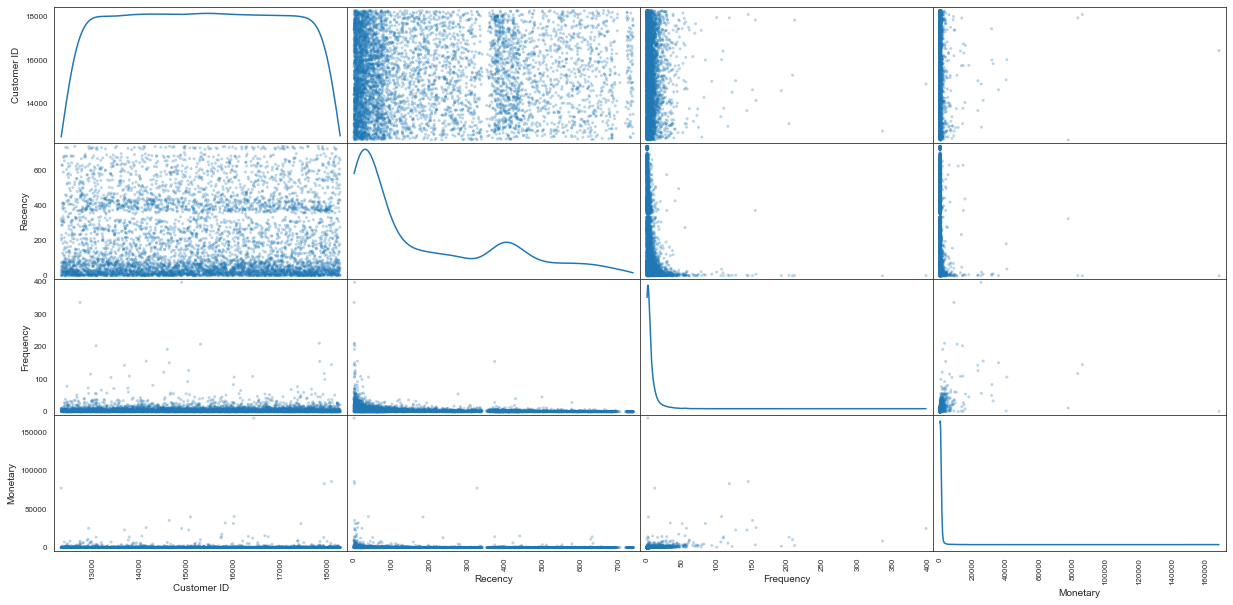

In [94]:
scatter_matrix(prediction_data, alpha = 0.3, figsize = (21,10), diagonal = 'kde');

In [95]:
#Log transformation
prediction_data_Rlog = np.log(prediction_data['Recency'])
prediction_data_Flog = np.log(prediction_data['Frequency'])
prediction_data_Mlog = np.log(prediction_data['Monetary'])
prediction_data_Llog = prediction_data['Loyalty_levels']

In [96]:
log_data=pd.DataFrame({'Monetary': prediction_data_Mlog,'Recency': prediction_data_Rlog,'Frequency': prediction_data_Flog})
log_data['Loyalty_levels']=prediction_data['Loyalty_levels']

In [97]:
log_data.head()

,Monetary,Recency,Frequency,Loyalty_levels
0,11.256714,5.786897,2.484907,Gold
1,5.197723,1.098612,2.079442,Gold
2,5.842268,4.330733,1.609438,Gold
3,5.532005,2.944439,1.386294,Gold
4,3.226844,5.739793,0.000000,Bronze


In [98]:
log_data.to_excel(r'C:/Users/sifne/Desktop/loyalty_levels.xlsx',index=False)

In [99]:
array=log_data.values
array

array([[11.256714152211668, 5.786897381366708, 2.4849066497880004,
        'Gold'],
       [5.197723251312334, 1.0986122886681098, 2.0794415416798357,
        'Gold'],
       [5.842268240745855, 4.330733340286331, 1.6094379124341003, 'Gold'],
       ...,
       [3.3978584803966405, 6.493753839851686, 0.0, 'Bronze'],
       [3.5553480614894135, 6.1675164908883415, 0.6931471805599453,
        'Bronze'],
       [5.080161356744866, 3.7612001156935624, 1.9459101490553132,
        'Silver']], dtype=object)

## Training - Testing Sets

In [100]:
from sklearn import preprocessing

X = log_data.iloc[:,0:2].values
Y = log_data.iloc[:,3].values
le = preprocessing.LabelEncoder()
le.fit(Y)
Y=le.transform(Y)

#Y[1:100]
validation_size = 0.3
seed = 123
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)


## SVM classifier

In [101]:
c=0.6
svm_rbf=SVC(kernel='rbf', C = c)
svm_rbf.fit(X_train, Y_train)
Y_pred_svm_rbf = svm_rbf.predict(X_test)
correct=0
for i in range(len(Y_pred_svm_rbf)):
    if(Y_pred_svm_rbf[i]==Y_test[i]):
        correct+=1
accuracy=correct/len(Y_pred_svm_rbf)

print( "For C: %.1f , Accuracy Score: %f" % (c,accuracy) )
print('Confusion matrix:')
confusion_matrix(Y_test,Y_pred_svm_rbf)


For C: 0.6 , Accuracy Score: 0.871169
Confusion matrix:


array([[662,   0,  68],
       [  0, 461,  39],
       [ 64,  56, 412]], dtype=int64)

In [102]:
print(classification_report(Y_test,Y_pred_svm_rbf))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       730
           1       0.89      0.92      0.91       500
           2       0.79      0.77      0.78       532

    accuracy                           0.87      1762
   macro avg       0.87      0.87      0.87      1762
weighted avg       0.87      0.87      0.87      1762



In [103]:
Y_pred_svm_rbf = svm_rbf.decision_function(X_test)
Y_pred_svm_rbf

array([[ 2.26542351, -0.24094236,  0.81155554],
       [ 2.27263112, -0.26898415,  0.92088348],
       [-0.26565551,  2.27282614,  0.87714547],
       ...,
       [ 2.26636662, -0.24474014,  0.81715028],
       [-0.27165831,  1.1584389 ,  2.25923887],
       [-0.27970794,  2.25589226,  1.21884926]])

In [104]:
#SVM with Linear kernel
c+=0.1
svm_linear=SVC(kernel='linear', C = c)
svm_linear.fit(X_train, Y_train)
Y_pred_svm_linear = svm_linear.predict(X_test)
correct=0
for i in range(len(Y_pred_svm_linear)):
    if(Y_pred_svm_linear[i]==Y_test[i]):
        correct+=1
accuracy=correct/len(Y_pred_svm_linear)
print( "For C: %.1f , Accuracy Score: %f" % (c,accuracy) )
print('Confusion matrix:')
confusion_matrix(Y_test,Y_pred_svm_linear)

For C: 0.7 , Accuracy Score: 0.846198
Confusion matrix:


array([[654,   1,  75],
       [  0, 439,  61],
       [ 69,  65, 398]], dtype=int64)

In [105]:
print(classification_report(Y_test,Y_pred_svm_linear))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       730
           1       0.87      0.88      0.87       500
           2       0.75      0.75      0.75       532

    accuracy                           0.85      1762
   macro avg       0.84      0.84      0.84      1762
weighted avg       0.85      0.85      0.85      1762



## Decision Tree classifier 

In [106]:
#decision tree
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [107]:
dt.score(X_test,Y_test)

0.8410896708286039

In [108]:
Y_pred_dt = dt.predict(X_test)
print('Confusion matrix: ')
confusion_matrix(Y_test,Y_pred_dt)

Confusion matrix: 


array([[658,   0,  72],
       [  0, 434,  66],
       [ 80,  62, 390]], dtype=int64)

In [109]:
print(classification_report(Y_test,Y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       730
           1       0.88      0.87      0.87       500
           2       0.74      0.73      0.74       532

    accuracy                           0.84      1762
   macro avg       0.84      0.83      0.83      1762
weighted avg       0.84      0.84      0.84      1762



## Random Forest classifier

In [110]:
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
rf.score(X_test,Y_test)

0.8524404086265607

In [112]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 1, ..., 0, 2, 1])

In [113]:
confusion_matrix(Y_test,y_pred_rf)

array([[672,   0,  58],
       [  0, 438,  62],
       [ 69,  71, 392]], dtype=int64)

In [114]:
print(classification_report(Y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       730
           1       0.86      0.88      0.87       500
           2       0.77      0.74      0.75       532

    accuracy                           0.85      1762
   macro avg       0.84      0.84      0.84      1762
weighted avg       0.85      0.85      0.85      1762



# Bagging classifier

In [115]:
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=20)
bg.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [116]:
bg.score(X_test,Y_test)

0.8626560726447219

In [117]:
y_pred_bg = bg.predict(X_test)

In [118]:
confusion_matrix(Y_test,y_pred_bg)

array([[675,   0,  55],
       [  0, 443,  57],
       [ 69,  61, 402]], dtype=int64)

In [119]:
print(classification_report(Y_test,y_pred_bg))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       730
           1       0.88      0.89      0.88       500
           2       0.78      0.76      0.77       532

    accuracy                           0.86      1762
   macro avg       0.86      0.86      0.86      1762
weighted avg       0.86      0.86      0.86      1762



## Ensemble methods

-Ensemble with lr, dt,svm

In [120]:
lr = LogisticRegression()
dt=DecisionTreeClassifier()
svm = SVC(kernel = 'rbf',degree=2)

In [121]:
evc = VotingClassifier(estimators=[('lr',lr),('dt',dt),('svm',svm)],voting = 'hard')

In [122]:
evc.fit(X_train,Y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [123]:
evc.score(X_test,Y_test)

0.8643586833144155

In [124]:
evc.score(X_train,Y_train)

0.8927007299270073

In [125]:
y_pred_evc = evc.predict(X_test)

In [126]:
confusion_matrix(Y_test,y_pred_evc)

array([[665,   0,  65],
       [  0, 450,  50],
       [ 70,  54, 408]], dtype=int64)

In [127]:
print(classification_report(Y_test,y_pred_evc))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       730
           1       0.89      0.90      0.90       500
           2       0.78      0.77      0.77       532

    accuracy                           0.86      1762
   macro avg       0.86      0.86      0.86      1762
weighted avg       0.86      0.86      0.86      1762



Ensembles with bg,dt,svm

In [128]:
evc2 = VotingClassifier(estimators=[('bg',bg),('dt',dt),('svm',svm)],voting = 'hard')

In [129]:
evc2.fit(X_train,Y_train)

VotingClassifier(estimators=[('bg',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                      class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=None,
                                                                                      max_features=None,
                                                                                      max_leaf_nodes=None,
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                                                                      min_samples_leaf=1,
          

In [130]:
y_pred_evc2 = evc2.predict(X_test)

In [131]:
confusion_matrix(Y_test,y_pred_evc2)

array([[675,   0,  55],
       [  0, 448,  52],
       [ 72,  58, 402]], dtype=int64)

In [132]:
print(classification_report(Y_test,y_pred_evc2))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       730
           1       0.89      0.90      0.89       500
           2       0.79      0.76      0.77       532

    accuracy                           0.87      1762
   macro avg       0.86      0.86      0.86      1762
weighted avg       0.86      0.87      0.86      1762

